In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from pandas import read_csv
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
df = pd.read_csv(r'/content/drive/My Drive/Manasa_ML/finalcombined.csv')
df.head()

,1,267,-32,-6,-92,-118,40,42,-108,51,40.1,20,90,89,82,34,105,99,106,-127,61,70,99.1,84,108,50,82.1,64,69,51.1,60,69.1,72,106.1,-124,98,82.2,70.1,37,55,...,87.1,17,-258,68,53,27.1,10,80,12,125,80.1,50.2,88.1,113,97,76,16,26,51.2,73,41.1,56.1,16.1,28,21.1,5,1.1,-258.1,-257,37.2,81,60.2,85,121,66,56.2,86,119,-118.1,119.1
0,1,49,80,59,53,54,105,-101,123,-80,-121,69,-125,103,106,-126,98,49,57,-119,56,41,52,28,32,81,-110,104,122,72,11,-267,59,74,66,-259,72,59,122,-71,...,-120,88,66,113,104,64,66,16,26,42,80,-112,112,96,121,-125,80,105,114,-92,92,99,92,80,107,104,8,41,39,38,32,42,50,32,82,89,117,116,50,66
1,1,36,69,-260,83,64,104,101,52,58,75,77,55,42,-306,-311,34,50,85,66,50,52,50,48,40,34,29,22,23,10,11,7,-267,82,61,68,72,58,7,-259,...,114,-106,108,-111,-108,-104,-107,-110,-315,-346,-339,-325,-322,12,52,50,21,41,40,48,77,52,51,-94,99,-127,-117,118,-126,-92,106,-126,82,69,102,58,74,65,80,90
2,1,44,96,91,70,49,43,61,64,0,11,22,50,49,66,77,58,118,103,-106,-106,-85,-108,91,87,-99,-111,-71,102,53,82,106,57,70,-281,-259,-258,-270,67,-112,...,125,-99,-116,106,76,85,87,37,48,87,100,100,84,39,28,53,58,72,24,41,72,48,-290,65,50,13,48,43,59,54,85,-262,55,8,59,114,53,70,87,-125
3,1,90,98,23,25,57,0,40,41,66,103,98,84,99,43,-285,40,85,90,-278,-291,-282,-267,29,85,57,72,75,59,67,99,102,57,71,92,108,-312,38,-122,-120,...,56,83,97,87,41,-302,27,82,41,48,70,66,62,83,-122,100,24,21,84,90,86,69,45,40,19,23,34,-265,56,51,25,-265,-281,-276,39,28,21,96,74,69
4,1,26,10,-269,-308,-316,-296,-301,-309,-375,-375,-374,-372,-358,-293,-285,-291,-290,3,-293,-127,-127,-53,-62,264,-24,-23,-62,124,-62,-105,-62,-110,4,118,88,45,-258,11,13,...,83,-71,-100,-84,109,81,124,84,92,113,80,76,116,74,29,71,5,2,50,82,60,90,-343,42,16,120,118,64,61,22,67,83,66,-125,71,77,106,120,107,80


In [0]:
df.fillna(df.mean(), inplace=True)

In [4]:
df.describe()

,1,267,-32,-6,-92,-118,40,42,-108,51,40.1,20,90,89,82,34,105,99,106,-127,61,70,99.1,84,108,50,82.1,64,69,51.1,60,69.1,72,106.1,-124,98,82.2,70.1,37,55,...,87.1,17,-258,68,53,27.1,10,80,12,125,80.1,50.2,88.1,113,97,76,16,26,51.2,73,41.1,56.1,16.1,28,21.1,5,1.1,-258.1,-257,37.2,81,60.2,85,121,66,56.2,86,119,-118.1,119.1
count,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,...,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000
mean,2.508982,33.607784,38.317365,29.829341,30.071856,33.023952,31.796407,27.248503,28.092814,32.464072,34.526946,28.107784,27.059880,35.859281,35.266467,28.020958,34.455090,31.913174,33.796407,33.029940,31.736527,39.206587,36.443114,34.479042,37.182635,31.458084,38.673653,37.931138,38.688623,31.985030,36.242515,33.640719,27.428144,35.952096,31.188623,28.595808,26.350299,25.865269,34.772455,27.949102,...,38.790419,37.715569,34.479042,30.898204,34.814371,37.170659,39.383234,37.913174,35.739521,32.619760,32.745509,34.835329,31.508982,40.368263,30.455090,33.538922,42.464072,43.479042,40.760479,30.491018,26.550898,30.401198,20.517964,27.883234,23.407186,33.613772,34.931138,28.179641,35.604790,42.233533,34.401198,34.916168,36.955090,24.580838,30.365269,28.458084,29.413174,36.640719,33.547904,32.188623
std,1.119675,99.975667,91.693253,100.870792,103.185746,97.307688,100.979559,106.264421,107.314448,104.788147,100.279358,110.526017,114.767774,106.951315,107.532819,111.985988,104.235942,108.550849,106.130864,99.062023,99.507267,102.136145,98.945983,100.840363,94.957836,98.399823,90.325727,85.284745,88.380416,94.908189,97.371882,98.315129,101.587043,91.311091,101.222099,115.661363,104.773974,98.193058,88.865163,96.978406,...,101.657367,105.538146,97.875716,98.792812,89.903427,81.402962,79.823735,84.428026,87.834788,93.770801,97.352080,93.398400,105.954286,84.475127,105.120135,109.581637,82.417145,90.418502,100.212969,110.081562,116.728357,111.650170,113.986873,116.766655,138.204495,122.206653,101.390326,105.718494,90.095442,88.592799,94.188844,98.766897,100.017061,109.234042,106.984120,96.975910,102.710781,99.179530,102.560796,106.218698
min,1.000000,-382.000000,-554.000000,-600.000000,-376.000000,-358.000000,-348.000000,-359.000000,-346.000000,-375.000000,-375.000000,-633.000000,-602.000000,-633.000000,-523.000000,-845.000000,-805.000000,-337.000000,-362.000000,-358.000000,-374.000000,-515.000000,-321.000000,-376.000000,-378.000000,-382.000000,-349.000000,-378.000000,-363.000000,-349.000000,-373.000000,-333.000000,-371.000000,-345.000000,-346.000000,-669.000000,-371.000000,-354.000000,-378.000000,-316.000000,...,-364.000000,-340.000000,-548.000000,-347.000000,-373.000000,-358.000000,-311.000000,-328.000000,-375.000000,-505.000000,-344.000000,-330.000000,-588.000000,-452.000000,-565.000000,-1062.000000,-518.000000,-374.000000,-375.000000,-521.000000,-690.000000,-804.000000,-468.000000,-1099.000000,-1634.000000,-1240.000000,-869.000000,-359.000000,-345.000000,-376.000000,-355.000000,-358.000000,-347.000000,-359.000000,-669.000000,-602.000000,-393.000000,-347.000000,-374.000000,-372.000000
25%,2.000000,35.000000,34.250000,29.750000,27.250000,32.250000,28.000000,24.000000,29.000000,34.000000,33.000000,27.000000,28.000000,35.250000,38.000000,20.250000,3

In [0]:
X = df.drop(['1'],axis=1)
y=df.loc[:,'1']

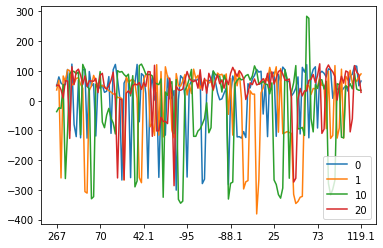

In [6]:
row = X.iloc[0]
row.plot(kind='line')
row = X.iloc[1]
row.plot(kind='line')
row = X.iloc[10]
row.plot(kind='line')
row = X.iloc[20]
row.plot(kind='line')
plt.legend(loc='best')

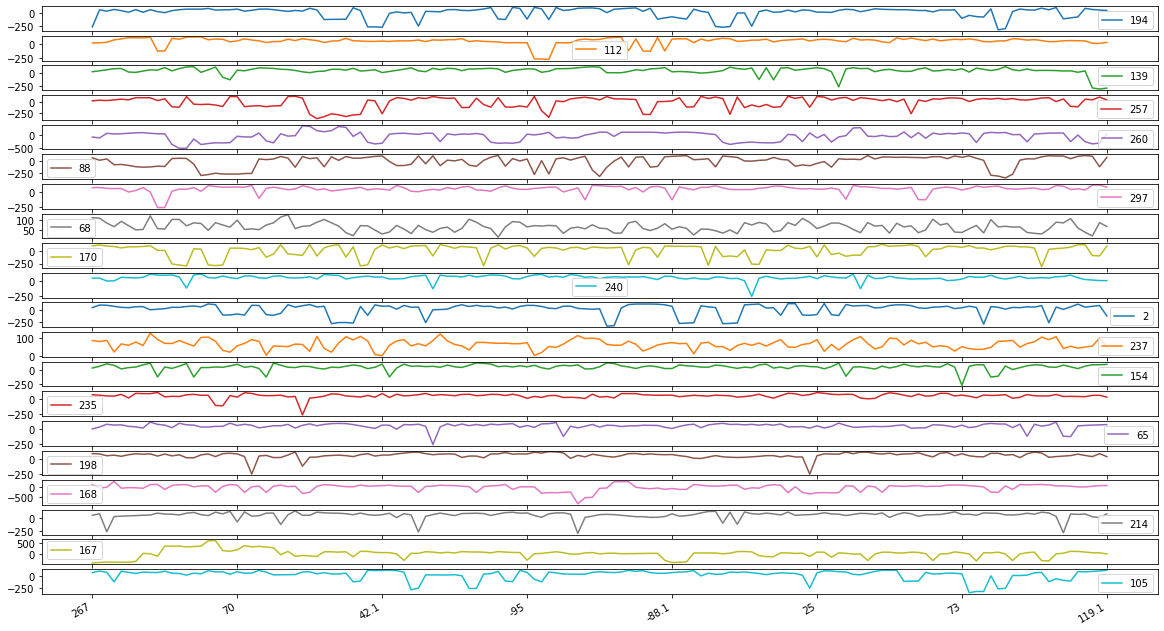

In [7]:
df1 = X.sample(n = 20).T
df1.plot(subplots=True, figsize=(20,12)); plt.legend(loc='best')

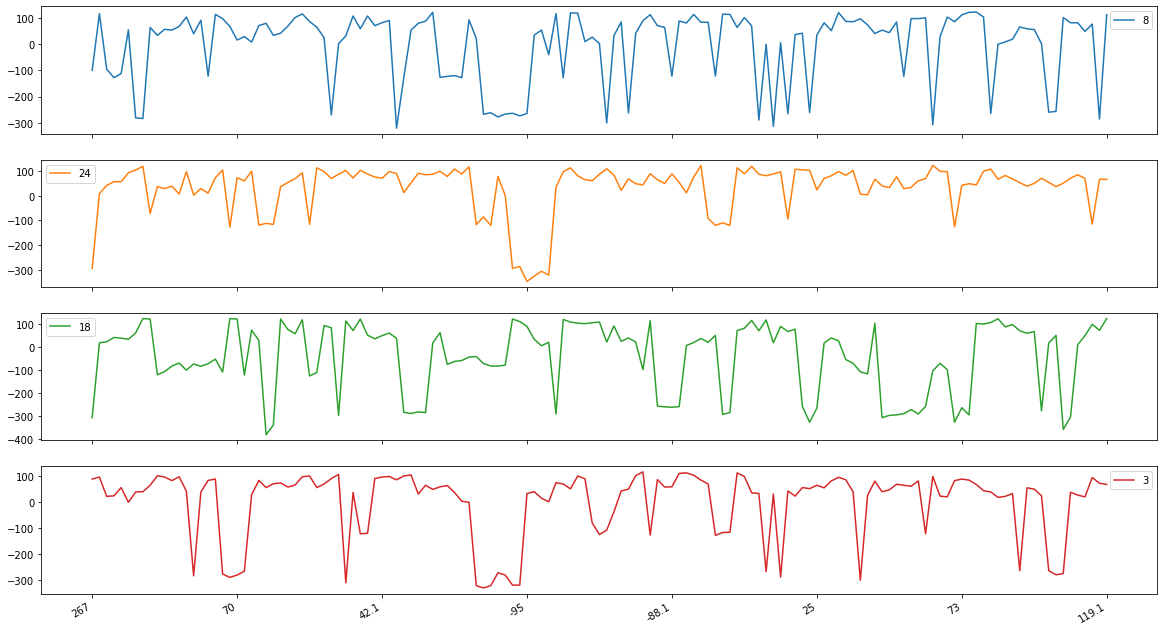

In [8]:
X_1 = X.iloc[:25,:]
df1 = X_1.sample(n = 4).T
df1.plot(subplots=True, figsize=(20,12)); plt.legend(loc='best')

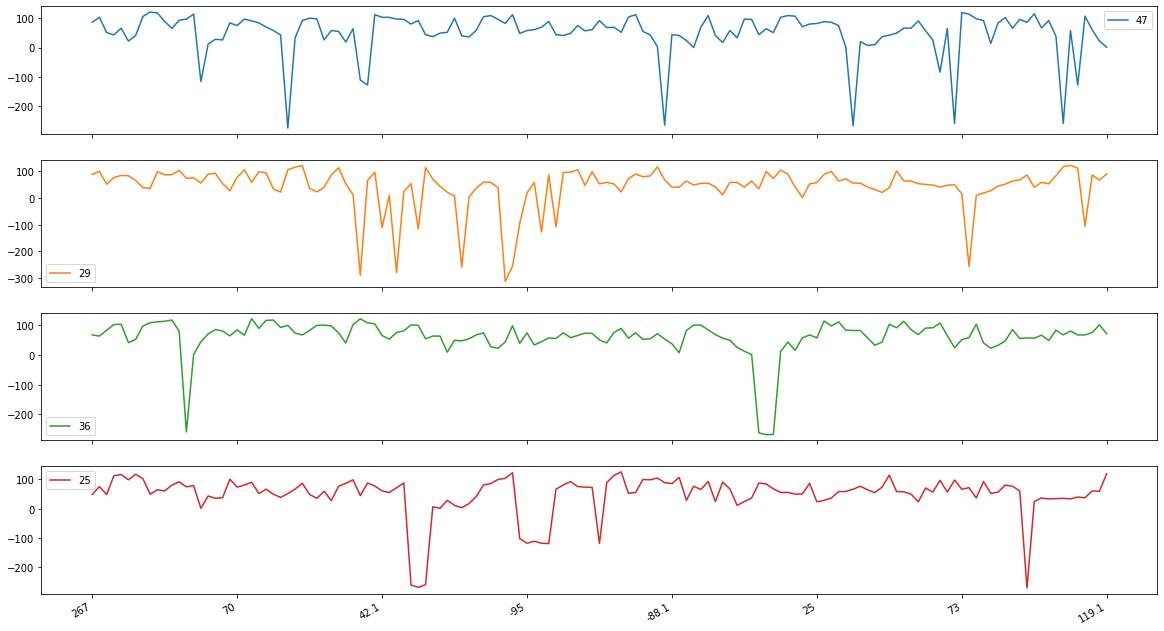

In [9]:
X_2 = X.iloc[25:50,:]
df1 = X_2.sample(n = 4).T
df1.plot(subplots=True, figsize=(20,12)); plt.legend(loc='best')

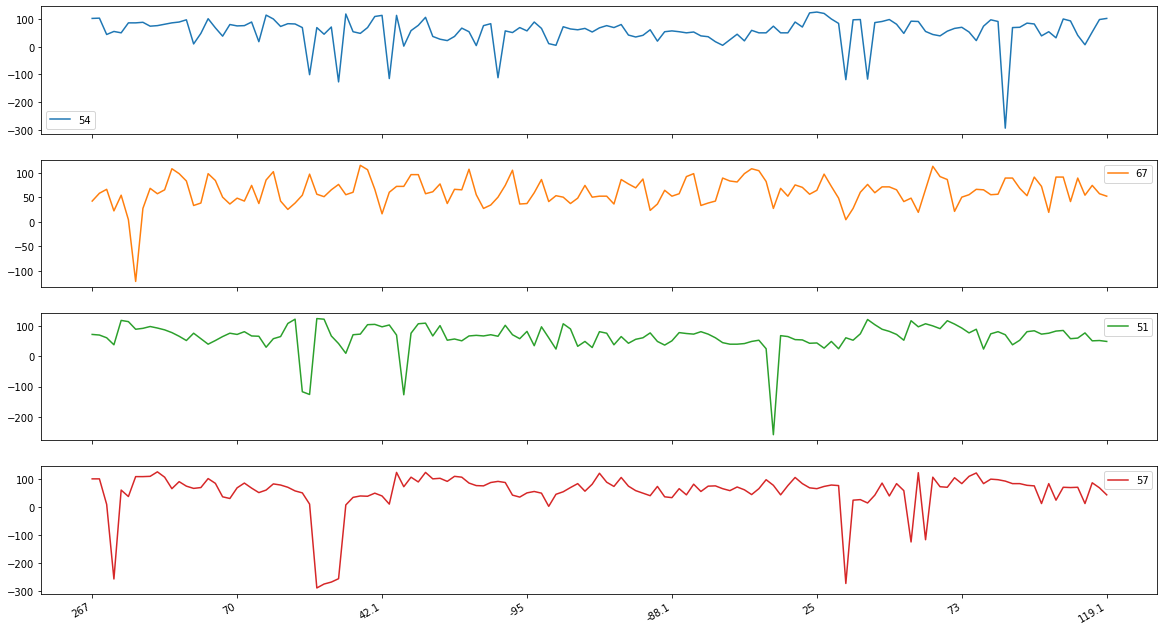

In [10]:
X_3 = X.iloc[50:75,:]
df1 = X_3.sample(n = 4).T
df1.plot(subplots=True, figsize=(20,12)); plt.legend(loc='best')

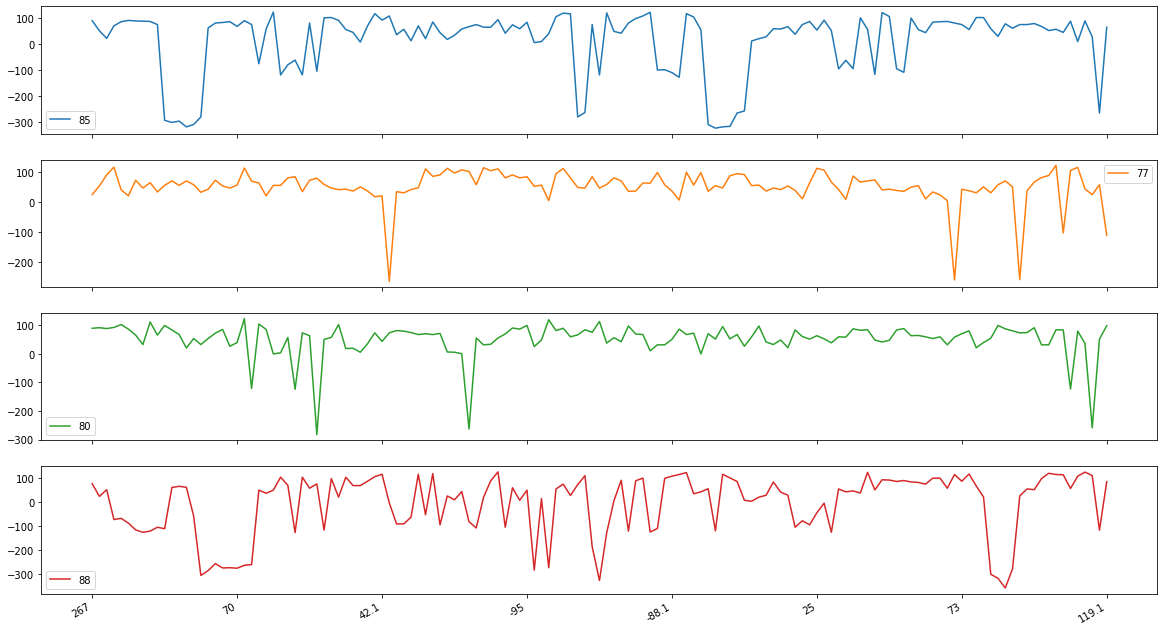

In [11]:
X_4 = X.iloc[75:100,:]
df1 = X_4.sample(n = 4).T
df1.plot(subplots=True, figsize=(20,12)); plt.legend(loc='best')

In [0]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical

X = df.drop(['1'],axis=1)
y=df.loc[:,'1']
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)
# y.loc[100] = '4' ####
y = y.astype(int)
y = to_categorical(y) 
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=16,test_size=0.33)

Xtrain_t = X_train.T
Xtest_t = X_test.T

scaler = StandardScaler()
Xtrain_n=scaler.fit_transform(Xtrain_t)
Xtest_n=scaler.fit_transform(Xtest_t)
X_train_n = np.reshape(Xtrain_n, (Xtrain_n.shape[1],Xtrain_n.shape[0],1))
X_test_n = np.reshape(Xtest_n, (Xtest_n.shape[1],Xtrain_n.shape[0],1))

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling1D, LeakyReLU
model = Sequential()
 
model.add(LSTM(units=32, activation='relu', return_sequences=True,input_shape=(Xtrain_n.shape[0],1)))
model.add(MaxPooling1D(pool_size=(2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(LeakyReLU(alpha=0.03))
model.add(Dropout(0.45))
model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [36]:
history = model.fit(X_train_n,y_train, validation_data=(X_test_n,y_test),epochs=100)

Train on 223 samples, validate on 111 samples
Epoch 1/100
223/223 [==============================] - 1s 4ms/step - loss: 27.8393 - accuracy: 0.2735 - val_loss: 12.4542 - val_accuracy: 0.2703
Epoch 2/100
223/223 [==============================] - 1s 2ms/step - loss: 18.9303 - accuracy: 0.2870 - val_loss: 9.9277 - val_accuracy: 0.2883
Epoch 3/100
223/223 [==============================] - 1s 2ms/step - loss: 17.1346 - accuracy: 0.2735 - val_loss: 4.2335 - val_accuracy: 0.2252
Epoch 4/100
223/223 [==============================] - 1s 2ms/step - loss: 6.4358 - accuracy: 0.3318 - val_loss: 3.0148 - val_accuracy: 0.2162
Epoch 5/100
223/223 [==============================] - 1s 2ms/step - loss: 5.6497 - accuracy: 0.2735 - val_loss: 2.5147 - val_accuracy: 0.2613
Epoch 6/100
223/223 [==============================] - 0s 2ms/step - loss: 3.2068 - accuracy: 0.2735 - val_loss: 1.5919 - val_accuracy: 0.2793
Epoch 7/100
223/223 [==============================] - 1s 2ms/step - loss: 2.7180 - accuracy

In [0]:
y_pred = model.predict(X_test_n)
ypred = np.argmax(y_pred, axis=1)

In [0]:
y_predt = model.predict(X_train_n)
ypred_train = np.argmax(y_predt, axis=1)

In [39]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
print("Training Score")
print("F1 Score: ",f1_score(np.argmax(y_train, axis=1), ypred_train, average='macro'))
print("Accuracy Score: ",accuracy_score(np.argmax(y_train, axis=1), ypred_train))
print("Testing Score")
print("F1 Score: ",f1_score(np.argmax(y_test, axis=1), ypred, average='macro'))
print("Accuracy Score: ",accuracy_score(np.argmax(y_test, axis=1), ypred))

Training Score
F1 Score:  0.41856015193058177
Accuracy Score:  0.5022421524663677
Testing Score
F1 Score:  0.1690631808278867
Accuracy Score:  0.25225225225225223


In [0]:
def lstmmodel(val):
  X = df.drop(['1'],axis=1)
  y=df.loc[:,'1']
  X = X.reset_index(drop=True)
  y = y.reset_index(drop=True)
  # y.loc[100] = '4' ####
  y = y.astype(int)
  y = to_categorical(y) 
  X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=16,test_size=val)

  Xtrain_t = X_train.T
  Xtest_t = X_test.T

  scaler = StandardScaler()
  Xtrain_n=scaler.fit_transform(Xtrain_t)
  Xtest_n=scaler.fit_transform(Xtest_t)
  X_train_n = np.reshape(Xtrain_n, (Xtrain_n.shape[1],Xtrain_n.shape[0],1))
  X_test_n = np.reshape(Xtest_n, (Xtest_n.shape[1],Xtrain_n.shape[0],1))
  model = Sequential()
 
  model.add(LSTM(units=32, activation='relu', return_sequences=True,input_shape=(Xtrain_n.shape[0],1)))
  model.add(MaxPooling1D(pool_size=(2)))
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(64, activation='relu'))
  model.add(LeakyReLU(alpha=0.03))
  model.add(Dropout(0.45))
  model.add(Dense(5, activation='softmax'))

  model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
  history = model.fit(X_train_n,y_train, validation_data=(X_test_n,y_test),epochs=100)
  y_pred = model.predict(X_test_n)
  ypred = np.argmax(y_pred, axis=1)
  y_predt = model.predict(X_train_n)
  ypred_train = np.argmax(y_predt, axis=1)
  print("Split:",val)
  print("Training Score")
  print("F1 Score: ",f1_score(np.argmax(y_train, axis=1), ypred_train, average='macro'))
  print("Accuracy Score: ",accuracy_score(np.argmax(y_train, axis=1), ypred_train))
  print("Testing Score")
  print("F1 Score: ",f1_score(np.argmax(y_test, axis=1), ypred, average='macro'))
  print("Accuracy Score: ",accuracy_score(np.argmax(y_test, axis=1), ypred))

In [41]:
val = [0.1,0.2,0.3,0.4,0.5,0.6,0.65,0.7,0.75,0.8,0.85]
for i in val:
  lstmmodel(i)

Train on 300 samples, validate on 34 samples
Epoch 1/100
300/300 [==============================] - 1s 4ms/step - loss: 1.4975 - accuracy: 0.2400 - val_loss: 1.4149 - val_accuracy: 0.2059
Epoch 2/100
300/300 [==============================] - 1s 2ms/step - loss: 1.4365 - accuracy: 0.2600 - val_loss: 1.3818 - val_accuracy: 0.2647
Epoch 3/100
300/300 [==============================] - 1s 2ms/step - loss: 1.3970 - accuracy: 0.3067 - val_loss: 1.3827 - val_accuracy: 0.3235
Epoch 4/100
300/300 [==============================] - 1s 2ms/step - loss: 1.4032 - accuracy: 0.3033 - val_loss: 1.3969 - val_accuracy: 0.2647
Epoch 5/100
300/300 [==============================] - 1s 2ms/step - loss: 1.3852 - accuracy: 0.3100 - val_loss: 1.3820 - val_accuracy: 0.2647
Epoch 6/100
300/300 [==============================] - 1s 2ms/step - loss: 1.3737 - accuracy: 0.3433 - val_loss: 1.3708 - val_accuracy: 0.3529
Epoch 7/100
300/300 [==============================] - 1s 2ms/step - loss: 1.3408 - accuracy: 0.3

In [0]:
from keras.layers import Conv1D, MaxPooling1D,GlobalAveragePooling1D

model = Sequential()
model.add(Conv1D(40, 10, strides=2, padding='same', activation='relu',input_shape=(Xtrain_n.shape[0],1) ))
model.add(Dropout(0.2))
model.add(MaxPooling1D(3))
model.add(Conv1D(40, 5, strides=2, padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPooling1D(3))
model.add(Conv1D(40, 4, strides=1, padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPooling1D(3))
model.add(GlobalAveragePooling1D())
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [0]:
history = model.fit(X_train_n,y_train, validation_data=(X_test_n,y_test),epochs=100)

Train on 223 samples, validate on 111 samples
Epoch 1/100
223/223 [==============================] - 0s 2ms/step - loss: 0.4902 - accuracy: 0.8000 - val_loss: 0.4815 - val_accuracy: 0.8000
Epoch 2/100
223/223 [==============================] - 0s 257us/step - loss: 0.4740 - accuracy: 0.8000 - val_loss: 0.4726 - val_accuracy: 0.8000
Epoch 3/100
223/223 [==============================] - 0s 251us/step - loss: 0.4642 - accuracy: 0.8000 - val_loss: 0.4666 - val_accuracy: 0.8000
Epoch 4/100
223/223 [==============================] - 0s 248us/step - loss: 0.4627 - accuracy: 0.7991 - val_loss: 0.4641 - val_accuracy: 0.8000
Epoch 5/100
223/223 [==============================] - 0s 241us/step - loss: 0.4653 - accuracy: 0.7991 - val_loss: 0.4617 - val_accuracy: 0.8000
Epoch 6/100
223/223 [==============================] - 0s 245us/step - loss: 0.4562 - accuracy: 0.7991 - val_loss: 0.4605 - val_accuracy: 0.8000
Epoch 7/100
223/223 [==============================] - 0s 267us/step - loss: 0.4615 - 

In [0]:
y_pred = model.predict(X_test_n)
ypred = np.argmax(y_pred, axis=1)
y_predt = model.predict(X_train_n)
ypred_train = np.argmax(y_predt, axis=1)
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
print("Training Score")
print("F1 Score: ",f1_score(np.argmax(y_train, axis=1), ypred_train, average='macro'))
print("Accuracy Score: ",accuracy_score(np.argmax(y_train, axis=1), ypred_train))
print("Testing Score")
print("F1 Score: ",f1_score(np.argmax(y_test, axis=1), ypred, average='macro'))
print("Accuracy Score: ",accuracy_score(np.argmax(y_test, axis=1), ypred))

Training Score
F1 Score:  1.0
Accuracy Score:  1.0
Testing Score
F1 Score:  0.25200970799278616
Accuracy Score:  0.26126126126126126


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling1D, LeakyReLU
from keras.layers import Conv1D, MaxPooling1D,GlobalAveragePooling1D


model = Sequential()
model.add(LSTM(units=32, activation='relu', return_sequences=True,input_shape=(Xtrain_n.shape[0],1)))
model.add(MaxPooling1D(pool_size=(2)))
model.add(Dropout(0.25))
model.add(Conv1D(40, 10, strides=2, padding='same', activation='relu',input_shape=(Xtrain_n.shape[0],1) ))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(LeakyReLU(alpha=0.03))
model.add(Dropout(0.4))
model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train_n,y_train, validation_data=(X_test_n,y_test),epochs=100)
              



Train on 223 samples, validate on 111 samples
Epoch 1/100
223/223 [==============================] - 1s 5ms/step - loss: 1.5557 - accuracy: 0.2377 - val_loss: 1.4630 - val_accuracy: 0.2432
Epoch 2/100
223/223 [==============================] - 1s 2ms/step - loss: 1.4559 - accuracy: 0.2646 - val_loss: 1.4092 - val_accuracy: 0.2252
Epoch 3/100
223/223 [==============================] - 1s 2ms/step - loss: 1.4157 - accuracy: 0.2556 - val_loss: 1.4120 - val_accuracy: 0.2162
Epoch 4/100
223/223 [==============================] - 1s 2ms/step - loss: 1.3833 - accuracy: 0.2870 - val_loss: 1.4190 - val_accuracy: 0.1892
Epoch 5/100
223/223 [==============================] - 1s 2ms/step - loss: 1.4146 - accuracy: 0.2691 - val_loss: 1.4255 - val_accuracy: 0.1622
Epoch 6/100
223/223 [==============================] - 1s 2ms/step - loss: 1.3464 - accuracy: 0.3543 - val_loss: 1.4243 - val_accuracy: 0.2252
Epoch 7/100
223/223 [==============================] - 1s 2ms/step - loss: 1.3317 - accuracy: 0.

In [0]:
y_pred = model.predict(X_test_n)
ypred = np.argmax(y_pred, axis=1)
y_predt = model.predict(X_train_n)
ypred_train = np.argmax(y_predt, axis=1)
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
print("Training Score")
print("F1 Score: ",f1_score(np.argmax(y_train, axis=1), ypred_train, average='macro'))
print("Accuracy Score: ",accuracy_score(np.argmax(y_train, axis=1), ypred_train))
print("Testing Score")
print("F1 Score: ",f1_score(np.argmax(y_test, axis=1), ypred, average='macro'))
print("Accuracy Score: ",accuracy_score(np.argmax(y_test, axis=1), ypred))

Training Score
F1 Score:  1.0
Accuracy Score:  1.0
Testing Score
F1 Score:  0.252625805566982
Accuracy Score:  0.25225225225225223


In [10]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling1D, LeakyReLU
from keras.layers import Conv1D, MaxPooling1D,GlobalAveragePooling1D
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical
X = df.drop(['1'],axis=1)
y=df.loc[:,'1']
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)
# y.loc[100] = '4' ####
y = y.astype(int)
y = to_categorical(y) 
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=16,test_size=0.33)

Xtrain_t = X_train.T
Xtest_t = X_test.T

# scaler = StandardScaler()
# Xtrain_n=scaler.fit_transform(Xtrain_t)
# Xtest_n=scaler.fit_transform(Xtest_t)
# X_train_n = np.reshape(Xtrain_n, (Xtrain_n.shape[1],Xtrain_n.shape[0],1))
# X_test_n = np.reshape(Xtest_n, (Xtest_n.shape[1],Xtrain_n.shape[0],1))




Xtrain_n=np.asarray(Xtrain_t)
Xtest_n=np.asarray(Xtest_t)
X_train_n = np.reshape(Xtrain_n, (Xtrain_n.shape[1],Xtrain_n.shape[0],1))
X_test_n = np.reshape(Xtest_n, (Xtest_n.shape[1],Xtrain_n.shape[0],1))



model = Sequential()
model.add(Conv1D(40, 10, strides=2, padding='same', activation='relu',input_shape=(Xtrain_n.shape[0],1) ))
model.add(Dropout(0.55))
model.add(MaxPooling1D(3))
model.add(Conv1D(40, 5, strides=2, padding='same', activation='relu'))
model.add(Dropout(0.10))
model.add(MaxPooling1D(3))
model.add(Conv1D(40, 4, strides=1, padding='same', activation='relu'))
model.add(Dropout(0.15))
model.add(MaxPooling1D(3))
model.add(GlobalAveragePooling1D())
model.add(Dense(50, activation='relu'))
model.add(LeakyReLU(alpha=0.03))
model.add(Dropout(0.65))
model.add(Dense(5, activation='softmax'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history = model.fit(X_train_n,y_train, validation_data=(X_test_n,y_test),epochs=100)


Train on 223 samples, validate on 111 samples
Epoch 1/100
223/223 [==============================] - 1s 3ms/step - loss: 4.2451 - accuracy: 0.6969 - val_loss: 2.7258 - val_accuracy: 0.6937
Epoch 2/100
223/223 [==============================] - 0s 256us/step - loss: 4.3832 - accuracy: 0.6843 - val_loss: 4.4269 - val_accuracy: 0.6937
Epoch 3/100
223/223 [==============================] - 0s 237us/step - loss: 4.2815 - accuracy: 0.6951 - val_loss: 4.6426 - val_accuracy: 0.6973
Epoch 4/100
223/223 [==============================] - 0s 223us/step - loss: 4.3867 - accuracy: 0.6915 - val_loss: 4.6426 - val_accuracy: 0.6973
Epoch 5/100
223/223 [==============================] - 0s 229us/step - loss: 4.5070 - accuracy: 0.6879 - val_loss: 4.6426 - val_accuracy: 0.6973
Epoch 6/100
223/223 [==============================] - 0s 221us/step - loss: 4.2716 - accuracy: 0.7004 - val_loss: 4.6426 - val_accuracy: 0.6973
Epoch 7/100
223/223 [==============================] - 0s 231us/step - loss: 4.4716 - 

In [11]:
y_pred = model.predict(X_test_n)
ypred = np.argmax(y_pred, axis=1)
y_predt = model.predict(X_train_n)
ypred_train = np.argmax(y_predt, axis=1)
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
print("Training Score")
print("F1 Score: ",f1_score(np.argmax(y_train, axis=1), ypred_train, average='macro'))
print("Accuracy Score: ",accuracy_score(np.argmax(y_train, axis=1), ypred_train))
print("Testing Score")
print("F1 Score: ",f1_score(np.argmax(y_test, axis=1), ypred, average='macro'))
print("Accuracy Score: ",accuracy_score(np.argmax(y_test, axis=1), ypred))

Training Score
F1 Score:  0.13637290901672786
Accuracy Score:  0.25112107623318386
Testing Score
F1 Score:  0.12081678956324447
Accuracy Score:  0.23423423423423423


In [14]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling1D, LeakyReLU
from keras.layers import Conv1D, MaxPooling1D,GlobalAveragePooling1D
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
def crossval(spl):
  X = df.drop(['1'],axis=1)
  y=df.loc[:,'1']
  X = X.reset_index(drop=True)
  y = y.reset_index(drop=True)
  # y.loc[100] = '4' ####
  y = y.astype(int)
  y = to_categorical(y) 
  X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=16,test_size=spl)

  Xtrain_t = X_train.T
  Xtest_t = X_test.T

  # scaler = StandardScaler()
  # Xtrain_n=scaler.fit_transform(Xtrain_t)
  # Xtest_n=scaler.fit_transform(Xtest_t)
  # X_train_n = np.reshape(Xtrain_n, (Xtrain_n.shape[1],Xtrain_n.shape[0],1))
  # X_test_n = np.reshape(Xtest_n, (Xtest_n.shape[1],Xtrain_n.shape[0],1))




  Xtrain_n=np.asarray(Xtrain_t)
  Xtest_n=np.asarray(Xtest_t)
  X_train_n = np.reshape(Xtrain_n, (Xtrain_n.shape[1],Xtrain_n.shape[0],1))
  X_test_n = np.reshape(Xtest_n, (Xtest_n.shape[1],Xtrain_n.shape[0],1))



  model = Sequential()
  model.add(Conv1D(40, 10, strides=2, padding='same', activation='relu',input_shape=(Xtrain_n.shape[0],1) ))
  model.add(Dropout(0.55))
  model.add(MaxPooling1D(3))
  model.add(Conv1D(40, 5, strides=2, padding='same', activation='relu'))
  model.add(Dropout(0.10))
  model.add(MaxPooling1D(3))
  model.add(Conv1D(40, 4, strides=1, padding='same', activation='relu'))
  model.add(Dropout(0.15))
  model.add(MaxPooling1D(3))
  model.add(GlobalAveragePooling1D())
  model.add(Dense(50, activation='relu'))
  model.add(LeakyReLU(alpha=0.03))
  model.add(Dropout(0.65))
  model.add(Dense(5, activation='softmax'))

  model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
  history = model.fit(X_train_n,y_train, validation_data=(X_test_n,y_test),epochs=100)
  y_pred = model.predict(X_test_n)
  ypred = np.argmax(y_pred, axis=1)
  y_predt = model.predict(X_train_n)
  ypred_train = np.argmax(y_predt, axis=1)
  from sklearn.metrics import f1_score
  from sklearn.metrics import accuracy_score
  print("Split",spl)
  print("Training Score")
  print("F1 Score: ",f1_score(np.argmax(y_train, axis=1), ypred_train, average='macro'))
  print("Accuracy Score: ",accuracy_score(np.argmax(y_train, axis=1), ypred_train))
  print("Testing Score")
  print("F1 Score: ",f1_score(np.argmax(y_test, axis=1), ypred, average='macro'))
  print("Accuracy Score: ",accuracy_score(np.argmax(y_test, axis=1), ypred))


val = [0.1,0.2,0.3]
for i in val:
  crossval(i)

Train on 300 samples, validate on 34 samples
Epoch 1/100
300/300 [==============================] - 0s 1ms/step - loss: 4.0977 - accuracy: 0.6987 - val_loss: 4.0789 - val_accuracy: 0.6824
Epoch 2/100
300/300 [==============================] - 0s 201us/step - loss: 4.2116 - accuracy: 0.6880 - val_loss: 4.4376 - val_accuracy: 0.6824
Epoch 3/100
300/300 [==============================] - 0s 203us/step - loss: 3.8505 - accuracy: 0.7133 - val_loss: 3.3384 - val_accuracy: 0.6706
Epoch 4/100
300/300 [==============================] - 0s 195us/step - loss: 4.3335 - accuracy: 0.6800 - val_loss: 4.1019 - val_accuracy: 0.6824
Epoch 5/100
300/300 [==============================] - 0s 202us/step - loss: 4.1499 - accuracy: 0.6793 - val_loss: 2.8323 - val_accuracy: 0.7059
Epoch 6/100
300/300 [==============================] - 0s 205us/step - loss: 3.9550 - accuracy: 0.7020 - val_loss: 2.5120 - val_accuracy: 0.7176
Epoch 7/100
300/300 [==============================] - 0s 231us/step - loss: 3.9140 - a